# Data analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr


### 1) Load datasets from BIN file

In [2]:
import pickle
with open('aida.bin', 'rb') as outfile:
    aida_articles=pickle.load(outfile)
with open('wes2015.bin', 'rb') as outfile:
    wes_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

### 2) Distribution of AIDA collections 

In [3]:
from collections import defaultdict

d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

### 3) Get frequency distributions of forms and instances

In [4]:
all_articles=aida_articles.union(wes_articles)

In [5]:
import time
import plot_utils

t1=time.time()
#print(example_article.identifier)
wes_cnt_instances, wes_cnt_forms=plot_utils.get_mention_counts(wes_articles)
aida_cnt_instances, aida_cnt_forms=plot_utils.get_mention_counts(aida_articles)
all_cnt_instances, all_cnt_forms=plot_utils.get_mention_counts(all_articles)
aida_cnt_instances.pop('--NME--', None)
t2=time.time()


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

In [6]:
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
save=True

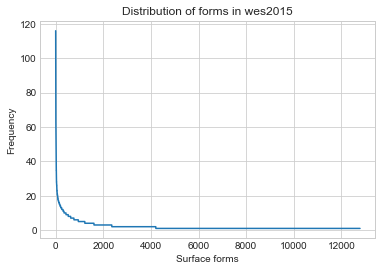

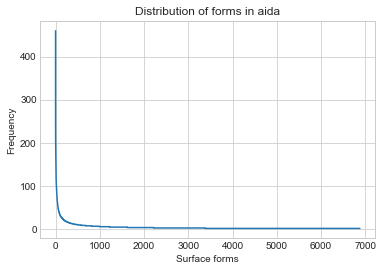

In [8]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', save=save)

**4.2. Log-log plots**

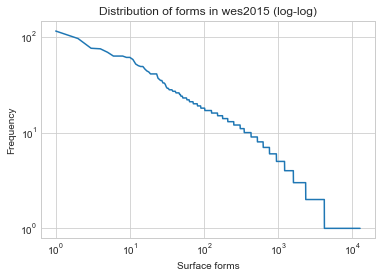

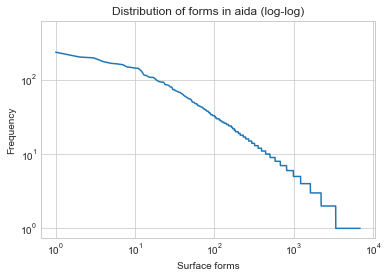

In [9]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [10]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_forms)
wes_slope=plot_utils.calculate_slope(wes_cnt_forms)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0022036164183156324, intercept=11.620965629475819, rvalue=-0.37260300743819236, pvalue=1.8815464484624348e-225, stderr=6.6190701161751247e-05)
LinregressResult(slope=-0.00049347163012393794, intercept=5.3903221820524916, rvalue=-0.46468730737613617, pvalue=0.0, stderr=8.3165696362870735e-06)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

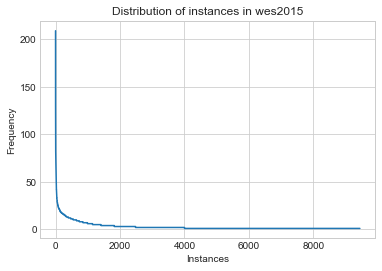

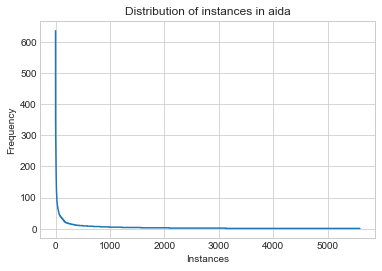

In [11]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', save=save)

**5.2. Log-log plots**

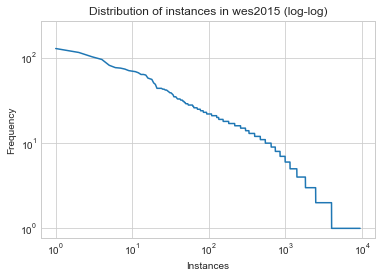

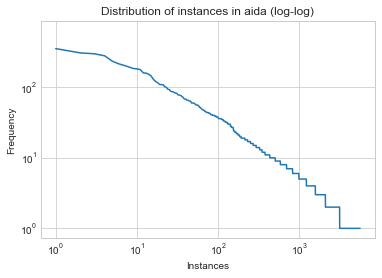

In [12]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)

**5.3. Slope** 

In [13]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_instances)
wes_slope=plot_utils.calculate_slope(wes_cnt_instances)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034990210669294578, intercept=14.75680125464558, rvalue=-0.3382295714741132, pvalue=1.0049300262640952e-149, stderr=0.00013019947269153514)
LinregressResult(slope=-0.00105588227994161, intercept=8.0121420692953293, rvalue=-0.49799538354507872, pvalue=0.0, stderr=1.8923012612086585e-05)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [14]:
from collections import Counter

skip_zeros=True

wes_pr_agg, wes_pr_uniq, wes_pageranks =plot_utils.get_pageranks(wes_articles, skip_zeros=skip_zeros)
wes_pageranks = Counter(wes_pageranks)

aida_pr_agg, aida_pr_uniq, aida_pageranks =plot_utils.get_pageranks(aida_articles, skip_zeros=skip_zeros)
aida_pageranks = Counter(aida_pageranks)

#### 6.2. Plot the PR distribution

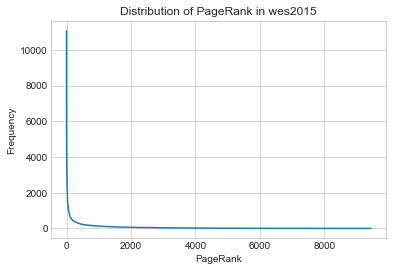

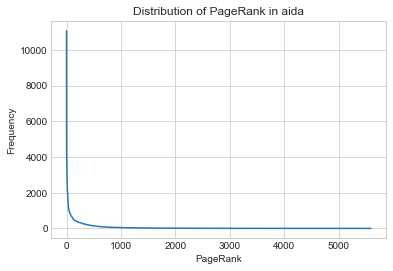

In [15]:
#plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
#                          x_axis='Instances', save=save)
plot_utils.plot_freq_dist(wes_pageranks, 
                           title='PageRank in ' + wes_title, 
                           x_axis='PageRank', save=True)
plot_utils.plot_freq_dist(aida_pageranks, 
                           title='PageRank in ' + aida_title, 
                           x_axis='PageRank', save=True)

#### 6.3. Plot the PR distribution (log-log plot)

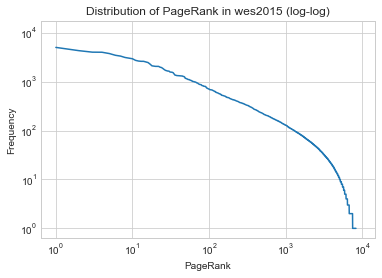

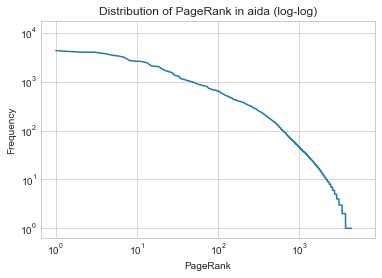

In [16]:
plot_utils.plot_freq_dist(wes_pageranks, 'PageRank in ' + wes_title, 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_pageranks, 'PageRank in ' + aida_title, 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)

#### 6.4. Inspect individual pagerank

In [17]:
# United_States has a max pageRank of 11066. 
pr=11066
print(wes_pr_agg[pr], aida_pr_agg[pr], wes_pr_uniq[pr])


116 636 1


In [18]:
aida_pageranks['United_States']

11066

# Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [19]:
interpretations, references = plot_utils.get_interpretations_and_references(all_articles, skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [20]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'Iraqi': 1,
 'BAGHDAD': 1,
 'Kurdistan Democratic Party': 1,
 'KDP': 1,
 'Massoud Barzani': 1,
 'Kurds': 2,
 'Arbil': 1,
 'U.N.': 1,
 'Baghdad': 2,
 'Reuters': 1,
 'July 25': 1,
 '1920': 1,
 'British': 7,
 'biophysicist': 1,
 'X-ray crystallographer': 1,
 'Rosalind Elsie Franklin': 1,
 'X-ray images': 1,
 'DNA’s structure': 1,
 'X-ray': 1,
 'Franklin’s': 1,
 'Photo 51': 1,
 'Crick and Watson': 1,
 'DNA': 1,
 'double helix structure': 1,
 'Nobel Prize': 4,
 'Rosalind Franklin': 1,
 'Notting Hill, London': 1,
 'British Jewish': 1,
 'Franklin': 1,
 'science': 1,
 'Latin': 1,
 'sports': 1,
 'scientist': 1,
 'Newnham College, Cambridge': 1,
 '1938': 1,
 'chemistry': 1,
 '1941': 1,
 'Norrish': 1,
 "Franklin's": 1,
 'British Coal Utilisation Research Association': 1,
 '1945': 1,
 'Ph.D': 1,
 'CURA': 1,
 '1947': 1,
 'Paris': 4,
 '1950': 1,
 'France': 3,
 '1951': 1,
 "King's College in London": 1,
 "King's College": 2,
 'Maurice Wilkins': 1,
 'X-ray crystallography': 1,
 'Wilkins': 1,
 'J. D. 

In [21]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [22]:
agg_per_ambiguity

defaultdict(int, {1: 18234, 2: 813, 3: 160, 4: 49, 5: 16, 6: 6, 7: 1, 12: 1})

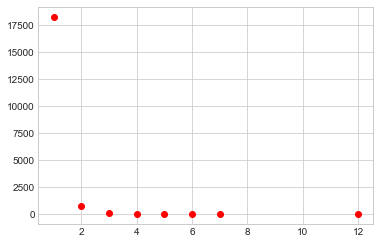

In [23]:
import matplotlib.pyplot as plt

plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [24]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

1046

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [25]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'Iraq': 5,
 'Baghdad': 2,
 'Kurdistan_Democratic_Party': 2,
 'Masoud_Barzani': 2,
 'Kurdistan': 3,
 'Erbil': 1,
 'United_Nations': 3,
 'Reuters': 2,
 'July_25': 2,
 '1920': 2,
 'Britishness': 2,
 'Biophysics': 1,
 'X-ray_crystallography': 3,
 'Rosalind_Franklin': 5,
 'Radiography': 1,
 'DNA': 3,
 'X-ray': 3,
 'Photo_51': 1,
 'Molecular_Structure_of_Nucleic_Acids:_A_Structure_for_Deoxyribose_Nucleic_Acid': 3,
 'Nucleic_acid_double_helix': 1,
 'Nobel_Prize': 2,
 'Notting_Hill': 1,
 'British_Jews': 1,
 'Science': 5,
 'Latin': 2,
 'Sport': 2,
 'Scientist': 3,
 'Newnham_College,_Cambridge': 1,
 '1938': 1,
 'Chemistry': 9,
 '1941': 3,
 'Ronald_George_Wreyford_Norrish': 1,
 'British_Coal_Utilisation_Research_Association': 2,
 '1945': 1,
 'Doctor_of_Philosophy': 7,
 '1947': 1,
 'Paris': 6,
 '1950': 2,
 'France': 7,
 '1951': 1,
 "King's_College_London": 3,
 'Maurice_Wilkins': 2,
 'John_Desmond_Bernal': 3,
 'Photographer': 4,
 '1953': 1,
 'Nature_(journal)': 2,
 'Birkbeck,_University_of_London'

In [26]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [27]:
agg_per_variance

defaultdict(int,
            {1: 10924,
             2: 2530,
             3: 759,
             4: 278,
             5: 110,
             6: 50,
             7: 19,
             8: 17,
             9: 6,
             10: 1,
             11: 1,
             12: 6,
             14: 1,
             18: 1})

In [28]:
sum(i for j,i in agg_per_variance.items() if j>1)

3779

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

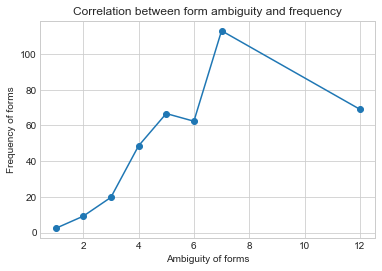

In [29]:
plot_utils.frequency_correlation(ambiguity, 
                                 all_cnt_forms, 
                                 title='Correlation between form ambiguity and frequency', 
                                 x_label='Ambiguity of forms', 
                                 y_label='Frequency of forms',
                                 save=save)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




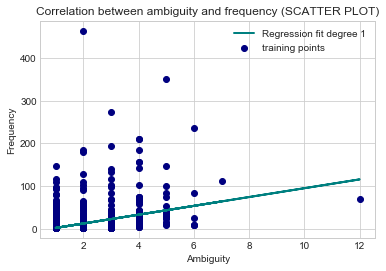

In [31]:
form_y_freq, form_x_amb = plot_utils.prepare_scatter_plot(
    all_cnt_forms, ambiguity)

plot_utils.scatter_plot(form_x_amb, form_y_freq,
                        x_axis='Ambiguity',
                        y_axis='Frequency',
                        title='Correlation between ambiguity and frequency (SCATTER PLOT)',
                        save=True,
                        degree=1
                        )


In [32]:
correlation, significance = spearmanr(form_x_amb,form_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.35559163525 . Significance:  0.0


In [33]:
bp_data = plot_utils.prepare_box_plot(form_x_amb, form_y_freq)

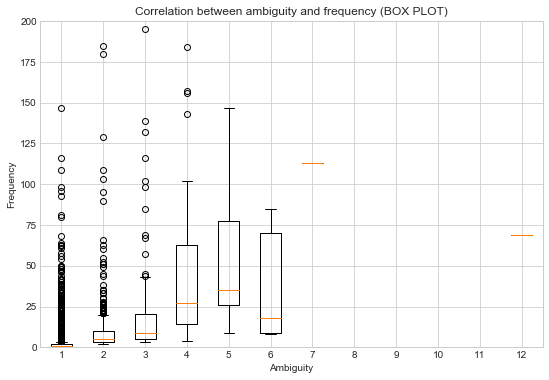

In [34]:
plot_utils.box_plot(bp_data, x_axis='Ambiguity', 
                    y_axis='Frequency',
                    title='Correlation between ambiguity and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

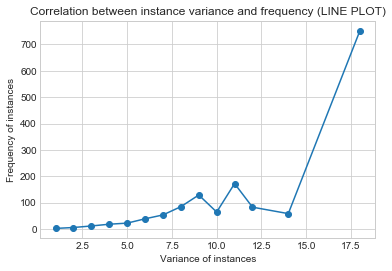

In [35]:
plot_utils.frequency_correlation(variance, 
                                 all_cnt_instances, 
                                 title='Correlation between instance variance and frequency (LINE PLOT)', 
                                 x_label='Variance of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

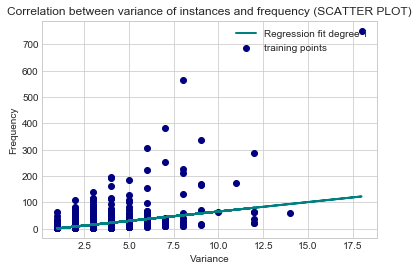

In [36]:

insta_y_freq, insta_x_var = plot_utils.prepare_scatter_plot(
    all_cnt_instances, variance)


plot_utils.scatter_plot(insta_x_var, insta_y_freq, 
                        x_axis='Variance',
                        y_axis='Frequency',
                        title='Correlation between variance of instances and frequency (SCATTER PLOT)',
                        save=True
                        )


In [37]:
correlation, significance = spearmanr(insta_x_var, insta_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.677235993586 . Significance:  0.0


In [38]:
bp_data = plot_utils.prepare_box_plot(insta_x_var, insta_y_freq)

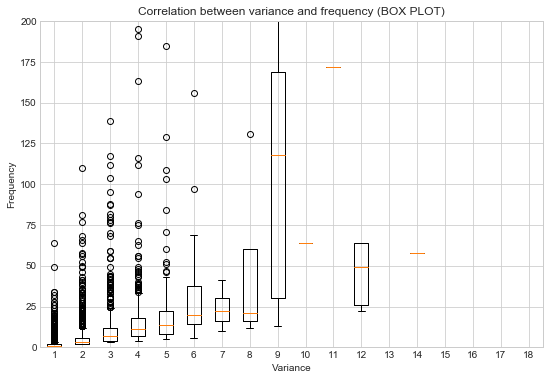

In [39]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='Frequency',
                    title='Correlation between variance and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [40]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

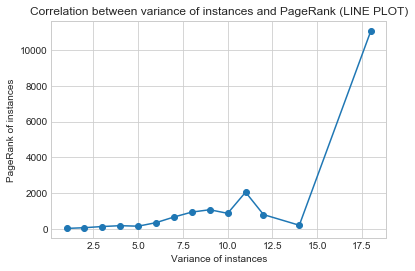

In [41]:
plot_utils.frequency_correlation(variance, 
                                 all_pr_instances, 
                                 title='Correlation between variance of instances and PageRank (LINE PLOT)',
                                 x_label='Variance of instances', 
                                 y_label='PageRank of instances',
                                 save=save)

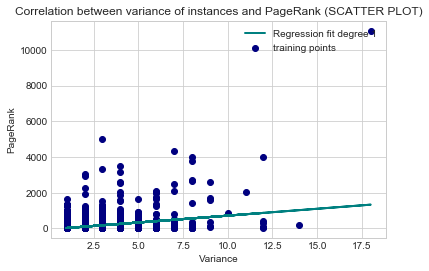

In [46]:
insta_y_pr, insta_x_var2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, variance)

plot_utils.scatter_plot(insta_x_var2, insta_y_pr, 
                        x_axis='Variance',
                        y_axis='PageRank',
                        title='Correlation between variance of instances and PageRank (SCATTER PLOT)',
                        save=True
                        )

In [47]:
correlation, significance = spearmanr(insta_x_var2, insta_y_pr)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.247163013066 . Significance:  3.36102419775e-171


In [48]:
bp_data = plot_utils.prepare_box_plot(insta_x_var2, insta_y_pr)

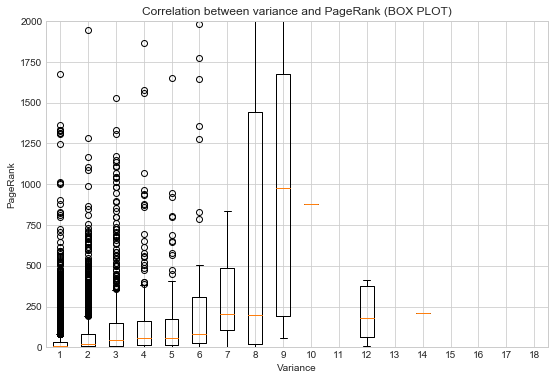

In [54]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='PageRank',
                    title='Correlation between variance and PageRank (BOX PLOT)',
                    y_lim=2000,
                    save=save)

### 13) Correlation between PageRank and frequency

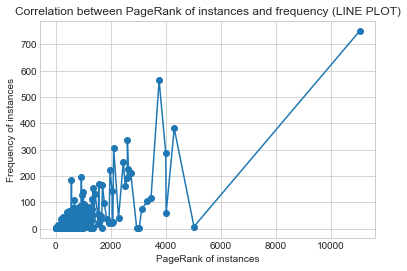

In [55]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

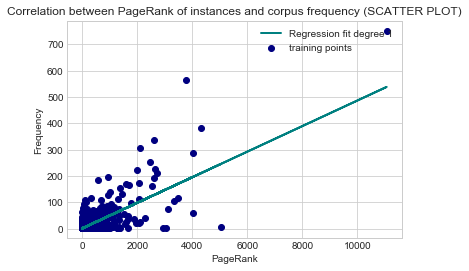

In [56]:
insta_x_pr_2, insta_y_freq2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, all_cnt_instances)

plot_utils.scatter_plot(insta_x_pr_2, insta_y_freq2, 
                        x_axis='PageRank',
                        y_axis='Frequency',
                        title='Correlation between PageRank of instances and corpus frequency (SCATTER PLOT)',
                        save=True
                        )

In [57]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.204178962887 . Significance:  2.64077939155e-116


### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [66]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=plot_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

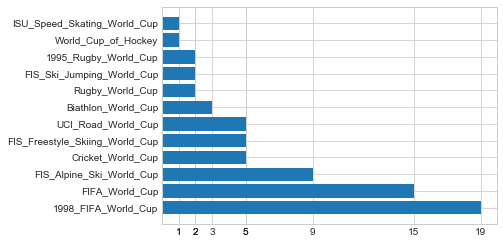

In [63]:
fig = plt.figure()

plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks(vs)

fig.savefig('img/world_cup_form_freq.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [64]:
form='World Cup' # this is the form with max ambiguity
import operator

fig = plt.figure()

ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

FIS_Alpine_Ski_World_Cup 	 21
Cricket_World_Cup 	 34
Biathlon_World_Cup 	 5
1995_Rugby_World_Cup 	 16
World_Cup_of_Hockey 	 6
ISU_Speed_Skating_World_Cup 	 3
1998_FIFA_World_Cup 	 59
FIS_Freestyle_Skiing_World_Cup 	 3
Rugby_World_Cup 	 52
UCI_Road_World_Cup 	 4
FIS_Ski_Jumping_World_Cup 	 9
FIFA_World_Cup 	 186


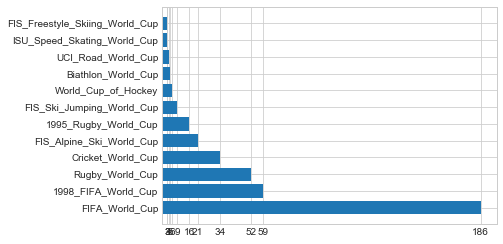

In [65]:
fig = plt.figure()

plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks(vs)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

In [79]:
prs=[]
freqs=[]
for form2, pr in reversed(entries):
    for form, freq in insts:
        if form==form2:
            print(form, freq, pr)
            freqs.append(freq)
            prs.append(pr)

FIS_Freestyle_Skiing_World_Cup 5 3
ISU_Speed_Skating_World_Cup 1 3
UCI_Road_World_Cup 5 4
Biathlon_World_Cup 3 5
World_Cup_of_Hockey 1 6
FIS_Ski_Jumping_World_Cup 2 9
1995_Rugby_World_Cup 2 16
FIS_Alpine_Ski_World_Cup 9 21
Cricket_World_Cup 5 34
Rugby_World_Cup 2 52
1998_FIFA_World_Cup 19 59
FIFA_World_Cup 15 186


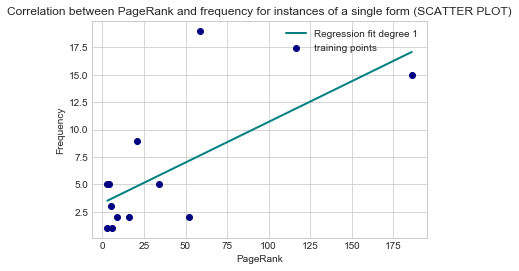

In [83]:
plot_utils.scatter_plot(np.array(prs), np.array(freqs), 
                        x_axis='PageRank',
                        y_axis='Frequency',
                        title='Correlation between PageRank and frequency for instances of a single form (SCATTER PLOT)',
                        save=True
                        )

In [85]:
correlation, significance = spearmanr(prs, freqs)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.50360974509 . Significance:  0.0950708553023


### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [87]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(all_articles, instance)

refs

fig = plt.figure()

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

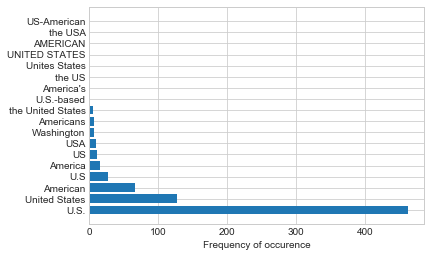

In [90]:
fig = plt.figure()

plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
#plt.xticks(vs)
plt.xlabel('Frequency of occurence')

fig.savefig('img/world_cup_insta_freq.png', bbox_inches='tight')

### 17) Entropy

In [ ]:
from scipy.stats import entropy
all_entropies=[]
for form in interpretations:
    counts=plot_utils.get_form_counts(all_articles, form)
    counts=list(counts)
    all_entropies.append(entropy(counts, base=len(counts)))

In [ ]:


sns.distplot(all_entropies, kde=False)

In [ ]:
all_entropies_lz = []
for ent in all_entropies:
    if ent>0.0:
        all_entropies_lz.append(ent)

In [ ]:
len(all_entropies_lz)

In [ ]:
sns.distplot(all_entropies_lz, kde=False)

In [ ]:
all_entropies_lz